In [244]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import os

In [256]:
dir_list = os.listdir("../logs/log_for_trust_comp/")
file_name_for_type =[]
for i in dir_list:
    file_name_for_type.append(i+"/world_1/"+os.listdir("../logs/log_for_trust_comp/"+i+"/world_1")[0])


['../logs/log_for_trust_comp/alice_run1_nt/world_1/actions__2023-03-14_225052.csv', '../logs/log_for_trust_comp/alice_run1_ot/world_1/actions__2023-03-15_092200.csv', '../logs/log_for_trust_comp/ben_run1_nt/world_1/actions__2023-03-15_061733.csv', '../logs/log_for_trust_comp/ben_run1_ot/world_1/actions__2023-03-15_100740.csv']


In [257]:
dir_list = os.listdir("../logs/our_trust//")
file_name_for_ot =[]
for i in dir_list:
    file_name_for_ot.append("../logs/our_trust/"+i+"/world_1/"+os.listdir("../logs/our_trust/"+i+"/world_1")[0])

In [277]:
def plot_graph_all_differnet_type(filenames, colours=['red', 'green', 'blue', 'black']):
    plt.rcParams['figure.figsize'] = [5,15]
    fig, (ax,ax1,ax2) = plt.subplots(3)
    ax.set_xlabel('Ticks') 
    ax.set_ylabel('Score')
    ax1.set_xlabel('Ticks') 
    ax1.set_ylabel('Score')
    ax2.set_xlabel('Ticks') 
    ax2.set_ylabel('Score')
    
    for i in filenames:
        #read the log file and select the score value
        df = pd.read_csv(i, delimiter=";")
        a= df['score'].to_numpy()
        x=[i for i in range(len(a))]
        
        #check who's run it is and plot accordingly
        name_of_run = i.split("/")[3].split("_")
        print(name_of_run)
        if name_of_run[0] == "alice":
            ax.plot(x, a, color=colours[check(name_of_run[-1])], alpha=0.5, label = name_of_run[0].title()+" "+name_of_run[-1])  
        elif name_of_run[0] == "ben":
            ax1.plot(x, a, color=colours[check(i)], alpha=0.5, label = name_of_run[0].title()+" "+name_of_run[-1])  
        else:
            ax2.plot(x, a, color=colours[check(i)], alpha=0.5, label = name_of_run[0].title()+" "+name_of_run[-1])  

        
    ax.legend(loc="upper left")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")
    
    
def check(i:str) ->  int:
    name = 
    if name =='nt':
        return 0
    elif name =='at':
        return 1
    elif name=='rt':
        return 2
    else:
        return 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['alice', 'run1', 'nt']
['alice', 'run1', 'ot']
['ben', 'run1', 'nt']
['ben', 'run1', 'ot']


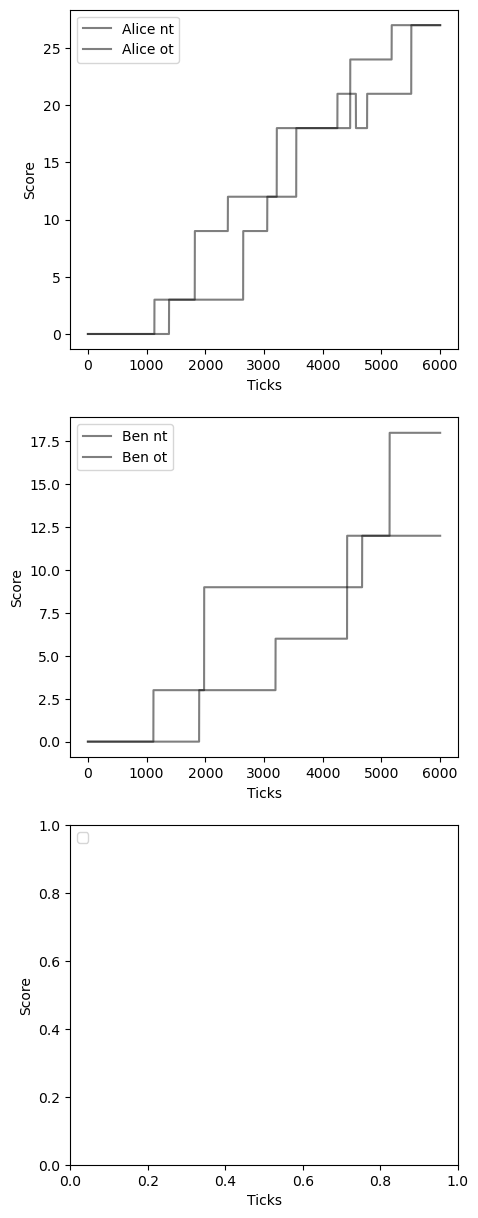

In [278]:
plot_graph_all_differnet_type(file_name_for_type)
plt.show()

In [230]:
def plot_graph_all_our_trust(filenames):
    plt.rcParams['figure.figsize'] = [5,15]
    fig, ax = plt.subplots()
    ax.set_xlabel('Ticks') 
    ax.set_ylabel('Score')
    ax1.set_xlabel('Ticks') 
    ax1.set_ylabel('Score')
    ax2.set_xlabel('Ticks') 
    ax2.set_ylabel('Score')
    
    for i in filenames:
        print(i)
        #read the log file and select the score value
        df = pd.read_csv(i, delimiter=";")
        a= df['score'].to_numpy()
        x=[i for i in range(len(a))]
        
        i = name_of_run = i.split("/")[0]
        print(i)
        ax3.plot(x, a, color="blue", alpha=0.5, label = "dfs")  
        

        
    ax.legend(loc="upper left")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")
    

NameError: name 'ax1' is not defined

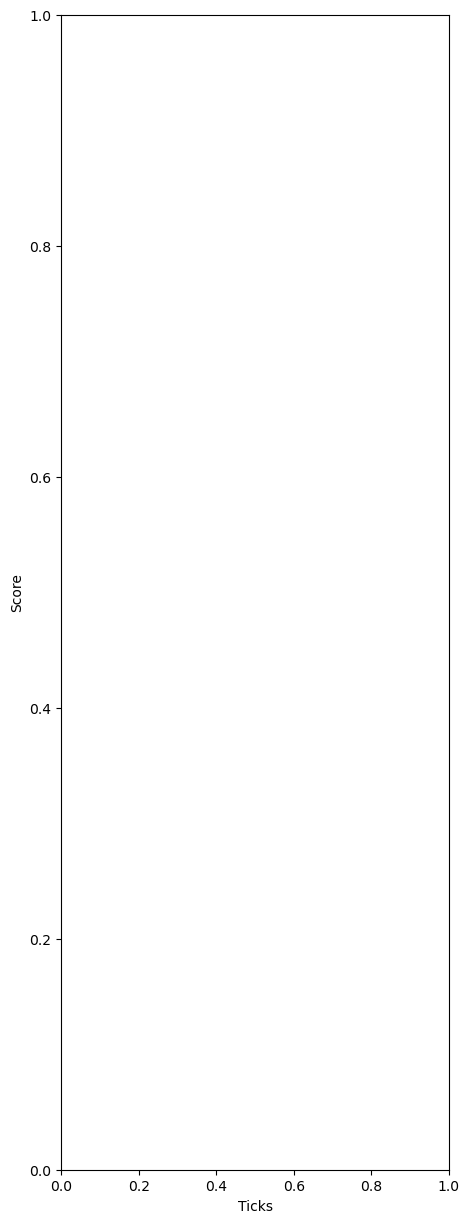

In [243]:
plot_graph_all_our_trust(file_name_for_ot[:3])